In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

smittodata = pd.ExcelFile("Folkhalsomyndigheten_Covid19.xlsx")
smittodata_v_r = pd.read_excel(smittodata, 'Veckodata Riket')
smittodata_v_r.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [4]:
smittodata_v_r.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,89.000000,89.000000,89.000000,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2020.460674,25.584270,13061.865169,126.011236,251.584270,4.885261e+05,4709.325843,88.606742,4261.741573,167.910112,16.233708,8923.303371,860.923595
std,0.501275,13.713637,14210.652869,137.184472,272.989003,4.559136e+05,4391.041264,83.646662,2609.965149,204.302952,19.765609,5126.703711,493.286226
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,2179.000000,21.000000,46.000000,7.279100e+04,705.000000,14.000000,2491.000000,17.000000,1.600000,5621.000000,544.299988
50%,2020.000000,25.000000,4608.000000,44.000000,100.000000,3.380260e+05,3273.000000,59.000000,3638.000000,82.000000,7.900000,8135.000000,787.700012
75%,2021.000000,36.000000,25405.000000,246.000000,485.000000,1.044862e+06,10067.000000,153.000000,7348.000000,235.000000,22.799999,14416.000000,1388.900024
max,2021.000000,53.000000,46177.000000,447.000000,869.000000,1.162506e+06,11200.000000,289.000000,7886.000000,664.000000,64.300003,14944.000000,1439.800049


In [5]:
smittodata_v_r['år'] = smittodata_v_r['år'].apply(str)
smittodata_v_r['veckonummer'] = smittodata_v_r['veckonummer'].apply(str)
smittodata_v_r["år"] = smittodata_v_r["år"]+"v"+smittodata_v_r["veckonummer"]
#smittodata_veckodata_riket.rename()
clean_s_d_v_r = smittodata_v_r.rename({"år" : "Vecka"}, axis= "columns")
#smittodata_veckodata_riket.drop("veckonummer")
#smittodata_v_r
clean_s_d_v_r.head()

,Vecka,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [13]:
import plotly_express as px

fig = px.line(clean_s_d_v_r, x= "Vecka", y = "Antal_fall_vecka", title= "Antal Covid-19 fall per vecka")
fig.show()
fig.write_html("Visualiseringar/Antal_fall_per_vecka.html")

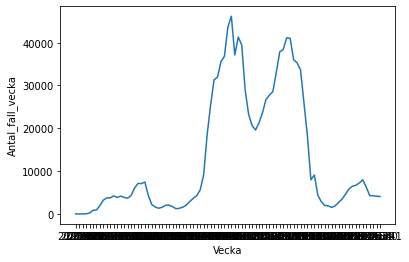

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data = clean_s_d_v_r, x = "Vecka", y = "Antal_fall_vecka")
plt.savefig("Visualiseringar/antal_fall.png")

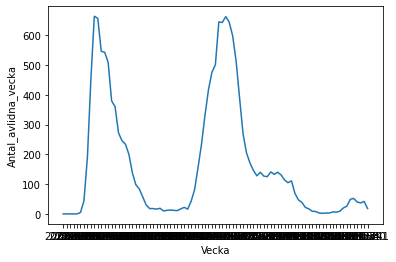

In [18]:
sns.lineplot(data = clean_s_d_v_r, x = "Vecka", y = "Antal_avlidna_vecka", )
plt.savefig("Visualiseringar/antal_avlidna_vecka.png")


In [19]:
fig1 = px.line(clean_s_d_v_r, x= "Vecka", y = "Antal_avlidna_vecka", title= "Antal Covid-19 avlidna per vecka")
fig1.show()
fig1.write_html("Visualiseringar/Avlidna___per_vecka.html")

In [15]:
fig1 = px.line(clean_s_d_v_r, x= "Vecka", y = "Antal_avlidna_vecka", title= "Antal Covid-19 avlidna per vecka", log_y=True)
fig1.add_scatter(x=clean_s_d_v_r["Vecka"],y=clean_s_d_v_r["Antal_fall_vecka"])
fig1.show()

fig1.write_html("Visualiseringar/Avlidna_antal_fall_per_vecka.html")

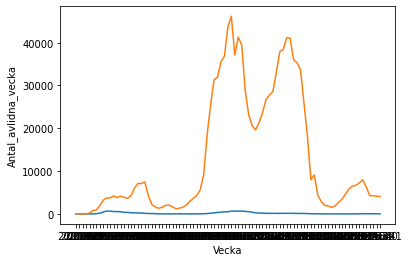

In [16]:
sns.lineplot(data = clean_s_d_v_r, x = "Vecka", y = "Antal_avlidna_vecka",)
sns.lineplot(data = clean_s_d_v_r, x = "Vecka", y = "Antal_fall_vecka")
plt.savefig("Visualiseringar/antal_avlidna_antal_fall.png")
